In [1]:
import torch

### A Simple Function

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad # The gradient is None by default

In [4]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_() # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### Detaching Computation

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Gradients and Python Control Flow

In [11]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c   

In [32]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(True)

### Exercises

In [39]:
x.grad.zero_()
y = torch.dot(x, x)
y.backward()
print(x.grad)

try:
    y.backward()
    print(x.grad)
except Exception as e:
    print(e)

tensor([0., 2., 4., 6.])
Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


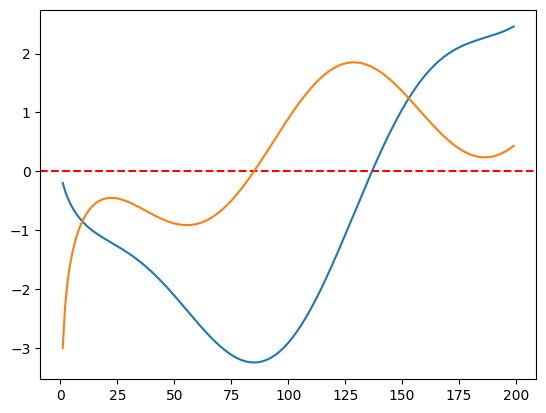

In [86]:
from matplotlib import pyplot as plt

x = torch.arange(0.0, 10.0, 0.05, requires_grad=True)
y = torch.sin(x) + x * torch.log(x) - 2 * x
y.sum().backward()
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(y.detach())
plt.plot(x.grad)
plt.show()
